<a href="https://colab.research.google.com/github/micheleclarice/CIENCIA-DE-DADOS/blob/main/Previs%C3%A3o_no_Cancelamento_dos_Servi%C3%A7os%2C_em_uma_empresa_de_Telecomunicac%CC%A7o%CC%83es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align ='center'="Michele Santana", width="35%" src="https://colab.research.google.com/drive/1681FNL6Pggo4zZULEDIkOcnTjczsJniR#scrollTo=sC2BFMOKN1M7">

# **Projeto - Previsão no Cancelamento dos Serviços, em  uma empresa de Telecomunicações**
por Michele Santana
</u>

<div>

  <u>Link Portfólio:</u><br>
https://github.com/micheleclarice 

https://www.linkedin.com/in/micheleclarice/

</div>

---  

# O que é "Previsão" e o que podemos esperar deste projeto?

<p align=center>
<img src="https://files.tecnoblog.net/wp-content/uploads/2022/01/o-que-e-analise-preditiva-adeolu-eletu-unsplash.png" width="60%"></p>

*Previsão de Cancelamento*, significa detectar quais clientes provavelmente deixarão um serviço, ou, cancelarão uma assinatura de um serviço.

## Porquê é tão importante entender isso?

Conseguir aumentar quantidade de clientes e manter o engajamento, não é uma tarefa fácil.

Como resultado, enteder isso, possibilitada à tomada de decisões para 'manter" o cliente e fidelizar a exepriência desse usuário.

Prever pode ter um impacto significativo no faturamento e principalmete na reputação da Empresa, então precisamos definir: “Esse cliente irá cancelar os serviçoes em X meses?” Sim ou não? 

# CRISP-DM

CRISP-DM é um modelo de processo de mineração de dados que descreve abordagens comumente usadas por especialistas em mineração de dados para atacar problemas.

Fases do processo:

* Entender o Negócio: foca em entender o objetivo do projeto a partir de uma perspectiva de negócios, definindo um plano preliminar para atingir os objetivos.      

* Entender os Dados: recolhimento de dados e inicio de atividades para familiarização com os dados, identificando problemas ou conjuntos interessantes.      

* Preparação dos Dados: construção do conjunto de dados final a partir dos dados iniciais. Normalmente ocorre várias vezes no processo.      

* Modelagem: várias técnicas de modelagem são aplicadas, e seus parâmetros calibrados para otimização. Assim, é comum retornar à Preparação dos Dados durante essa fase.      

* Avaliação: é construído um modelo que parece ter grande qualidade de uma perspectiva de análise de dados. No entanto, é necessário verificar se o modelo atinge os objetivos do negócio.      

* Implantação: o conhecimento adquirido pelo modelo é organizado e apresentado de uma maneira que o cliente possa utilizar. 




## CRISP-DM neste Projeto

### Fase 1 - Entendendo o negócio
### Fase 2 - Entendendo os dados
### Fase 3 - Preparação dos Dados
### Fase 4 - Modelagem
### Fase 5 - Avaliação
### Fase 6 - Implantanção


# Aquisição dos Dados

Os dados deste projeto estão disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).



## Instação de Pacotes Necessários

In [ ]:
!pip install scikit-plot

In [ ]:
!pip install missingno

In [ ]:
!pip install -U scikit-learn

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
!pip install imblearn

In [ ]:
!pip install xgboost

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import missingno

sns.set_style('whitegrid', {'axes.grid': False}) 
sns.set_palette('Accent')

# É possível obter a mesma aparência utilizando o estilo 'white'. No entanto,
# O uso de uma kwargs de rcParams permite um controle maior de customização

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

# OBS: Os modelos serão importados nas células correspondentes

In [ ]:
# Importação dos Dados
url = "https://raw.githubusercontent.com/ygordev/Data-Science/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Verificando se o processo de aquisição foi realizado com sucesso. 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Churn Yes equivale ao valor 1, após o processo de encoding.

df[df.customerID == "3668-QPYBK"]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


## Dicionário de Variáveis

* *customerID*: identificação única do usuário na empresa.
* *gender*: gênero do usuário.
* *SeniorCitizen*: Se o cliente é idoso ou não.
* *Partner*: Se o cliente possui acompanhante ou não.
* *Dependents*: Se o cliente possui dependentes.
* *tenure*: Período em que o cliente está na empresa.
* *PhoneService*: Se o cliente optou por serviços telefônicos.
* *MultipleLines*: Se o cliente possui múltiplas linhas de telefone.
* *InternetService*: Se o cliente optou por serviços de internet.
* *OnlineSecurity*: Se o cliente optou pelos serviços de segurança na internet.
* *OnlineBackup*: Se o cliente optou por serviços de backup na internet.
* *DeviceProtection*: Se o cliente optou por serviços de proteção de seu equipamento.
* *TechSupport*: Se o cliente optou por serviços de ajuda técnica na internet.
* *StreamingTV*: Se o cliente optou por serviços de streaming na TV.
* *StreamingMovies*: Se o cliente optou por serviços de streaming para Filmes.
* *Contract*: Tipo de contrato do cliente (mensal, anual ou de dois anos).
* *PaperlessBilling*: Se o cliente optou pelo faturamento online.
* *PaymentMethod*: Forma de pagamento (cheque eletrônico, transferência bancária e cartão de crédito).
* *MonthlyCharges*: Recargas mensais.
* *TotalCharges*: Recargas durante todo o período em que o cliente está na empresa.
* *Churn*: Se o cliente abandonou a empresa.

# Análise Exploratória

A Análise Exploratória é um primeiro contato com o dataset no qual estamos trabalhando. Para isso, faz-se necessário verificar como os dados estão dispostos, além de buscar possíveis tratamentos que devam ser feitos.

## Pandas Profiling

In [ ]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip -q

     | 25.9 MB 1.2 MB/s
     |████████████████████████████████| 10.9 MB 5.9 kB/s 
     |████████████████████████████████| 596 kB 13.4 MB/s 
     |████████████████████████████████| 102 kB 5.7 MB/s 
     |████████████████████████████████| 675 kB 47.6 MB/s 
     |████████████████████████████████| 4.7 MB 36.9 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 812 kB 49.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from pandas_profiling import ProfileReport

report = ProfileReport(df)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

O uso do Pandas Profiling nos permite ganhar velocidade na análise exploratória dos dados. É possível ver que:

* Existe uma **ALTA CORRELAÇÃO** entre tenure e TotalCharges, o que faz bastante sentido, pois quanto mais tempo um cliente está na empresa, mais terá remunerado a empresa pela prestação dos serviços
* Existe uma **ALTA CORRELAÇÃO** entre Partner e Dependent, o que também faz sentido, uma vez que são fatores que, naturalmente, caminham juntos.
* customerID possui uma distribuição uniforme, o que nos faz perceber que é um valor único utilizado para identificar unicamente cada usuário, bem como se encontra no dicionário de variáveis.

## Configuração da apresentação dos gráficos

In [ ]:
# configurar a visualização
%matplotlib inline

## Visualizando o tamanho do dataset

In [ ]:
df.shape

(7043, 21)

Trata-se, portanto, de um dataset onde existem 7043 entradas, com um total de 21 features.

## Visualizando as 5 primeiras entradas do dataset

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Verificando os tipos de variáveis do nosso dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Podemos observar que a feature 'TotalCharges' está descrita como do tipo 'object', o que nos leva a crer que ela está sendo tratada como String, ao invés de um float. Para isso, iremos realizar a conversão para o tipo de dados adequado.

In [ ]:
# Criação de uma função para tratamento de variáveis tipo "string" em float.

def converter_str_float(input):
  try:
    return float(input)
  except ValueError:
    return np.nan

In [ ]:
# Aplicando a função à feature TotalCharges, que deveria ser do tipo float, mas consta como string (object)

df['TotalCharges'] = df['TotalCharges'].apply(converter_str_float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Realizada a alteração do tipo de dados com sucesso, podemos prosseguir.

## Resumo estatístico do dataset

In [ ]:
# Visualizando o resumo estatístico do dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Balanceamento de Churn

[[Text(0, 0, 'Não'), Text(0, 0, 'Sim')]]

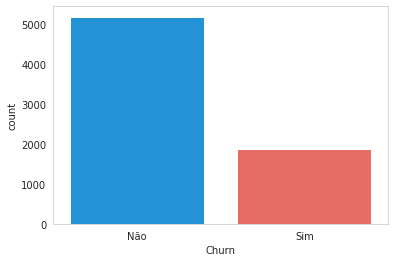

In [ ]:
# Verificando balanceamento dos dados

paleta = {classes: "xkcd:coral" if classes == 'Yes' else "xkcd:azure" for classes in df.Churn.unique()}

plot = sns.countplot('Churn', data=df, palette=paleta)
plot.set(xticklabels=['Não', 'Sim'])

In [ ]:
# Calculando a % de valores para Churn
print("Churn 'Yes' representam {:.4f}% do total de entradas".format((df[df.Churn == 'Yes'].shape[0] / df.shape[0])*100))
print("Churn 'No' representam {:.4f}% do total de entradas".format((df[df.Churn == 'No'].shape[0] / df.shape[0])*100))

Churn 'Yes' representam 26.5370% do total de entradas
Churn 'No' representam 73.4630% do total de entradas


Através da observação do gráfico do balanceamento da feature Churn, podemos observar que há um desbalanceamento leve, mas que pode interferir no desempenho do nosso modelo de Machine Learning. Iremos realizar o balanceamento posteriormente.

### Valores Ausentes

In [ ]:
# Mostrar porcentagem de valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

TotalCharges        0.001562
customerID          0.000000
DeviceProtection    0.000000
MonthlyCharges      0.000000
PaymentMethod       0.000000
PaperlessBilling    0.000000
Contract            0.000000
StreamingMovies     0.000000
StreamingTV         0.000000
TechSupport         0.000000
OnlineBackup        0.000000
gender              0.000000
OnlineSecurity      0.000000
InternetService     0.000000
MultipleLines       0.000000
PhoneService        0.000000
tenure              0.000000
Dependents          0.000000
Partner             0.000000
SeniorCitizen       0.000000
Churn               0.000000
dtype: float64

Observamos que há uma quantidade pequena de valores ausentes para a variável TotalCharges. Mas que, na verdade, são de usuários recém-chegados à empresa. Optaremos por manter estes valores.

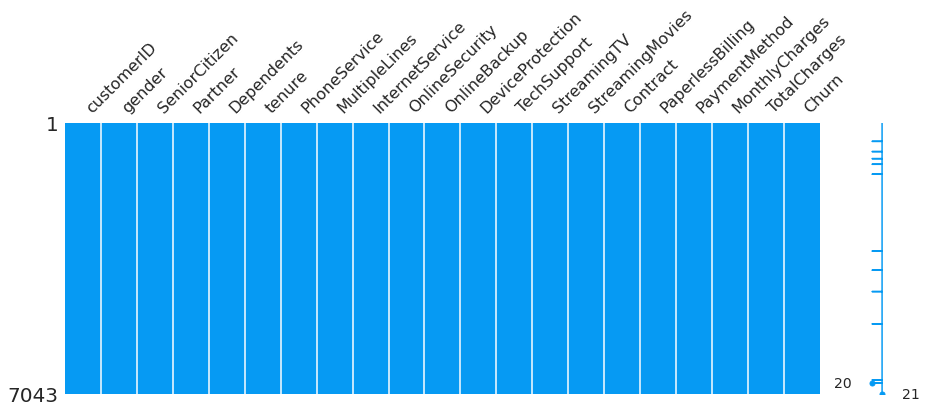

In [ ]:
# Verificando valores ausentes - biblioteca missingno
# Visualização gráfica de valores ausentes.
# Cor 'GOLD': 255, 215, 0 -> rgbConverter(255, 215, 0)
# Cor 'XKCD:AZURE': 6, 154, 243 -> rgbConverter(6, 154, 243)

def rgbConverter(r, g, b):
  r_percentage = "{:.3f}".format(r/255)
  g_percentage = "{:.3f}".format(g/255)
  b_percentage = "{:.3f}".format(b/255)
  return (float(r_percentage), float(g_percentage), float(b_percentage))

missingno.matrix(df, figsize=(15,5), color=rgbConverter(6, 154, 243))

### Histogramas das variáveis numéricas SeniorCitizen, tenure, MonthlyCharges e Total Charges

Text(0.5, 1.0, 'TotalCharges')

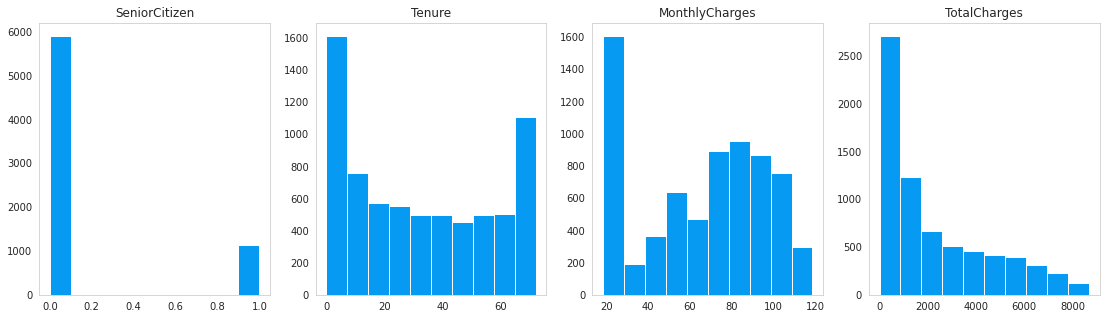

In [ ]:
# Histogramas das variáveis numéricas SeniorCitizen, tenure, MonthlyCharges e Total Charges

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(19,5))

df['SeniorCitizen'].hist(ax=ax[0], grid=False, color='xkcd:azure')
ax[0].set_title('SeniorCitizen')

df['tenure'].hist(ax=ax[1], grid=False, color='xkcd:azure')
ax[1].set_title('Tenure')

df['MonthlyCharges'].hist(ax=ax[2], grid=False, color='xkcd:azure')
ax[2].set_title('MonthlyCharges')

df['TotalCharges'].hist(ax=ax[3], grid=False, color='xkcd:azure')
ax[3].set_title('TotalCharges')

O histograma das classes numéricas nos permite observar que há uma relativa distribuição uniforme na clase 'Tenure', fora dos extremos.

No entanto, nos pontos extremos, cabe uma análise mais aprofundada, como:

* Houve, recentemente, alguma estatégia massiva do setor de marketing de captação de novos clientes? 

Caso sim, esta estratégia pode levar a uma alta no número de novos clientes, e consequentemente um valor mais alto de 'Tenure' no início. Caso negativo, pode indicar um Churn elevado nos primeiros meses, provavelmente ocasionado pela insatisfação dos clientes logo nos primeiros meses de contratação do serviço.

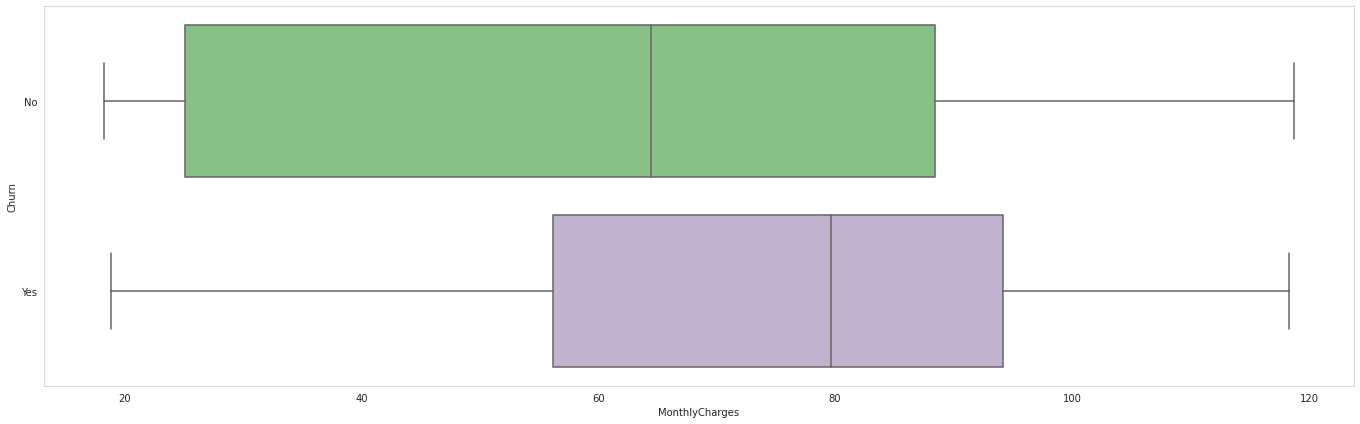

In [ ]:
# Boxplot para MonthlyCharges - Limpeza de dados caso necessário

fig, ax = plt.subplots(figsize=(19,6))
sns.boxplot(x=df.MonthlyCharges, y=df.Churn, ax=ax)
plt.tight_layout()
plt.show()

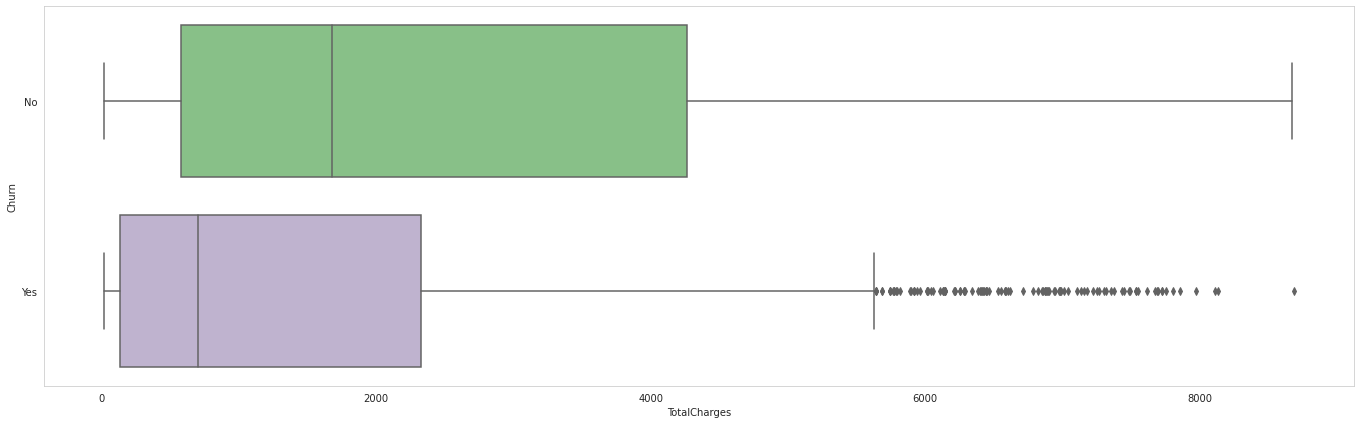

In [ ]:
# Boxplot para TotalCharges - Limpeza de dados caso necessário

fig, ax = plt.subplots(figsize=(19,6))
sns.boxplot(x=df.TotalCharges, y=df.Churn, ax=ax)
plt.tight_layout()
plt.show()

Talvez, de erros em cobrança que podem levar a um cliente desistir da empresa.

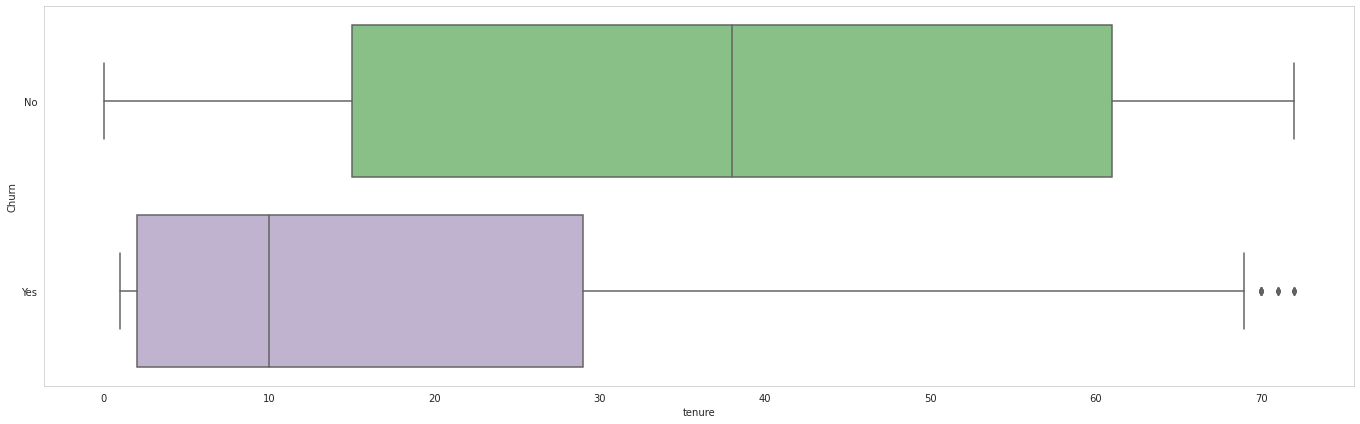

In [ ]:
# Boxplot para Tenure - Limpeza de dados caso necessário

fig, ax = plt.subplots(figsize=(19,6))
sns.boxplot(x=df.tenure, y=df.Churn, ax=ax)
plt.tight_layout()
plt.show()

## Label Encoding - Feature 'Churn'

Apesar da etapa de Label Encoding ser parte do processo de preparação dos dados, iremos realizar o Label Encoding antes, para tornar possível a execução de algumas visualizações de dados.

In [ ]:
from sklearn.preprocessing import LabelEncoder

textLabel = LabelEncoder()
df.Churn = textLabel.fit_transform(df.Churn)

# Verificando se ocorreu tudo corretamente
df.Churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

## Gender - Count e Gender versus Churn

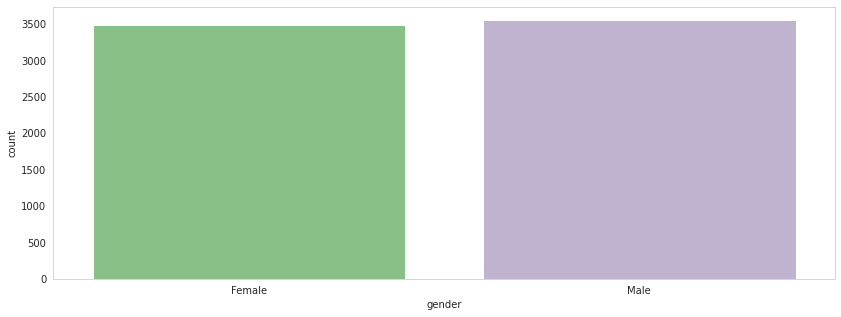

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

genderCount = sns.countplot(x='gender', data=df, ax=ax)

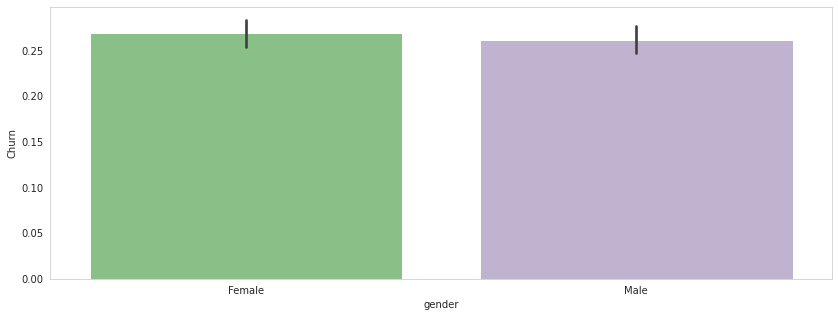

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

genderVsChurn = sns.barplot(df.gender, df.Churn, ax=ax)

## SeniorCitizen - Count e SeniorCitizen versus Churn

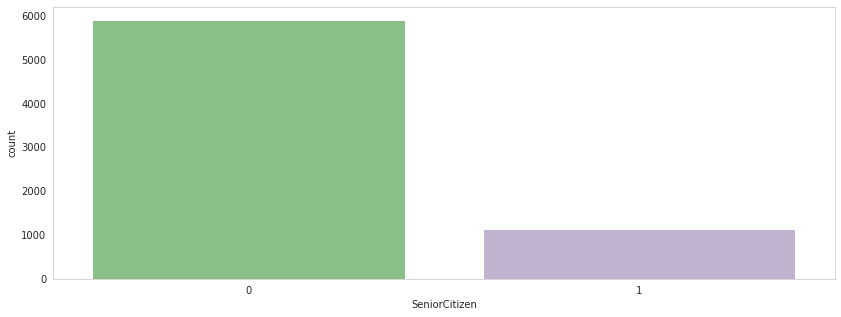

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

seniorCount = sns.countplot(x='SeniorCitizen', data=df, ax=ax)

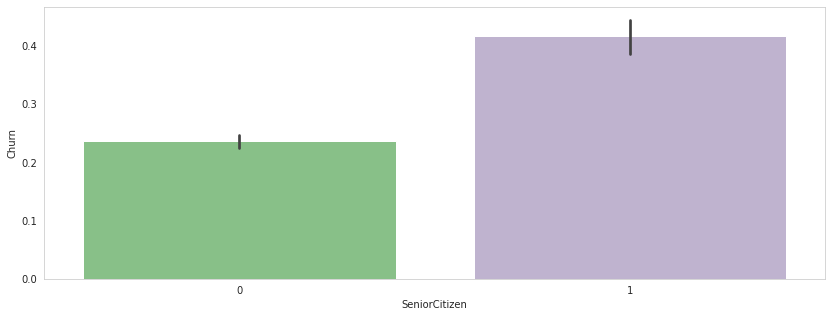

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

seniorVsChurn = sns.barplot(df.SeniorCitizen, df.Churn, ax=ax)

População "Idosos" são os que mais cancelam os serviços.
Caberia então uma ação de marketing direcionada à esses usuários, de forma a tentar reverter a tendência.

## Partner - Count e Partner versus Churn

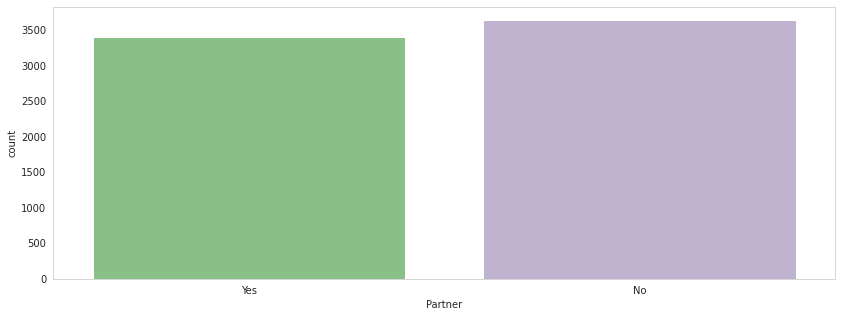

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

partnerCount = sns.countplot(x='Partner', data=df, ax=ax)

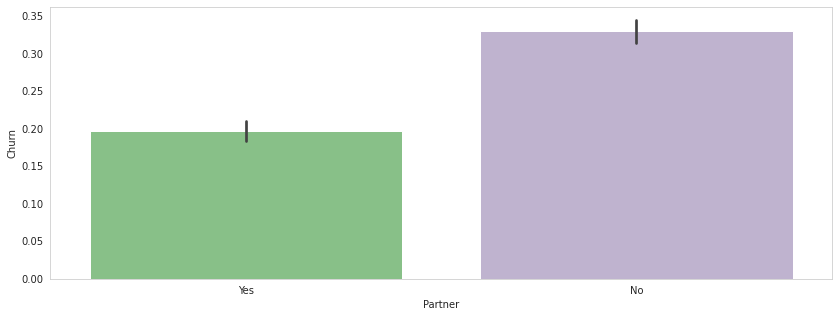

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

partnerVsChurn = sns.barplot(df.Partner, df.Churn, ax=ax)

Apesar do relativo balanceamento nas quantidades de usuários que possuem parceiros, os que não possuem parceiros possuem uma tendência de 12% a mais de desistirem.

## Dependents - Count e Dependents versus Churn

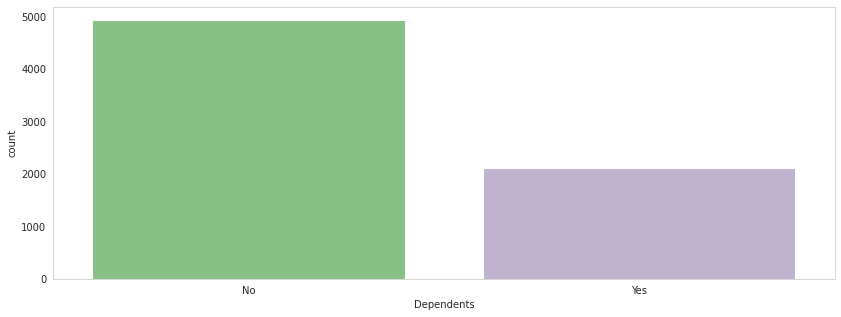

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

dependentsCount = sns.countplot(x='Dependents', data=df, ax=ax)

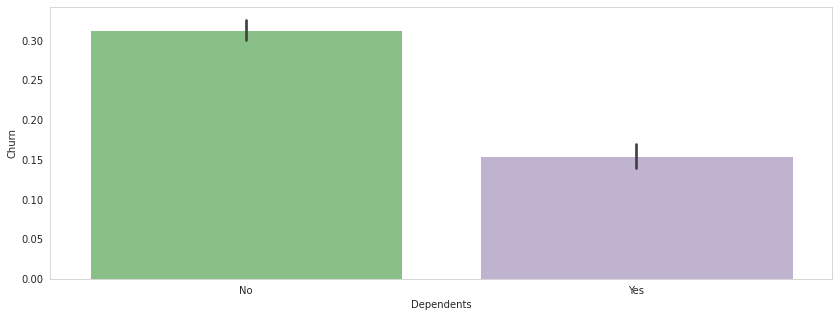

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

dependentVsChurn = sns.barplot(df.Dependents, df.Churn, ax=ax)

Para a feature Dependent, os dados estão relativamente balanceados. Não há, portanto, um ganho de informação relevante.

## phoneService - Count e PhoneService versus Churn

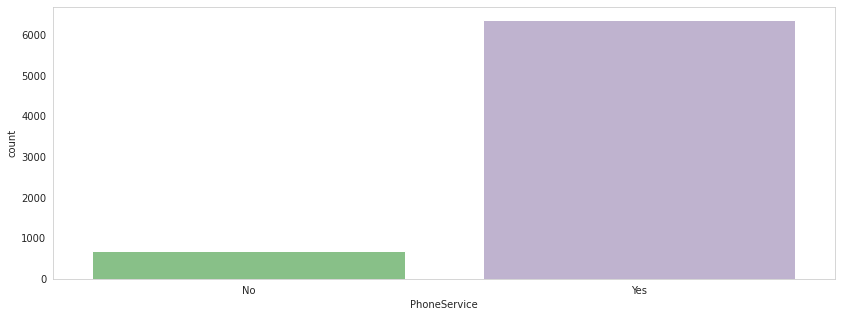

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

phoneServiceCount = sns.countplot(x='PhoneService', data=df, ax=ax)

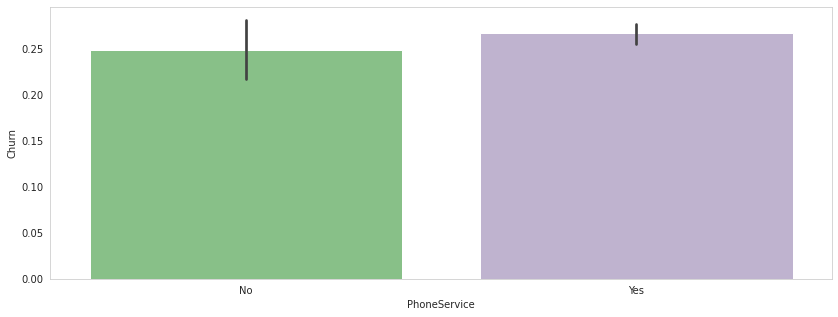

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

phoneServiceVsChurn = sns.barplot(df.PhoneService, df.Churn, ax=ax)

Na feature phoneService, temos uma densidade de Churn praticamente igual entre os que contratam serviço de telefone e os que não contratam. 

## InternetService - Count e InternetService versus Churn

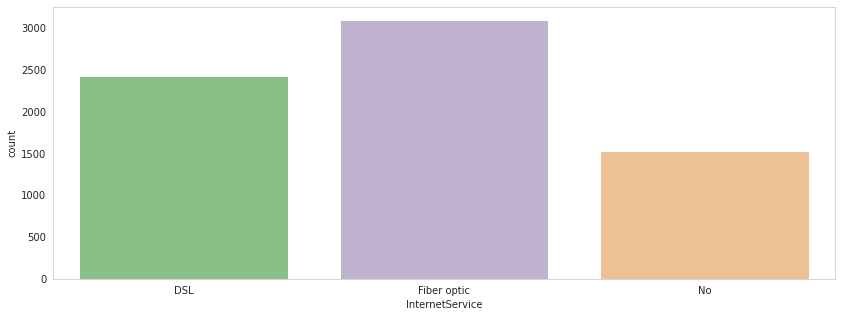

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

internetServiceCount = sns.countplot(x='InternetService', data=df, ax=ax)

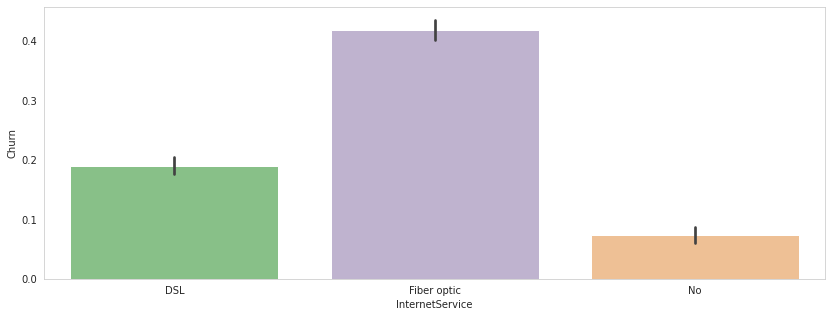

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

internetServiceVsChurn = sns.barplot(df.InternetService, df.Churn, ax=ax)

A densidade de churn está praticamente condizente com as quantidades de usuários das classes. A priori, não há como dizer algo sobre a relação da variável InternetService com a feature Churn.

## Contract - Count e Contract versus Churn

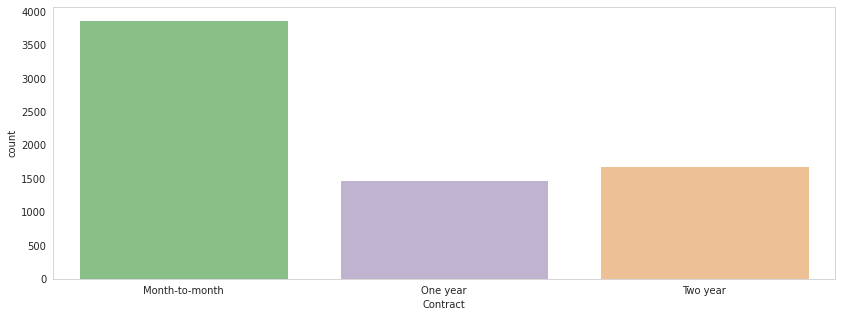

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

contractCount = sns.countplot(x='Contract', data=df, ax=ax)

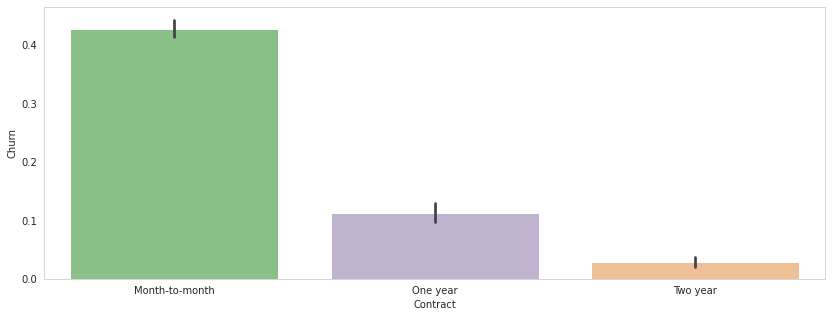

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

contractVersusChurn = sns.barplot(df.Contract, df.Churn, ax=ax)

Há algo interessante a se ressaltar: Os usuários que contratam o serviço por dois anos, são em quantidade pouco maiores que os que contratam por um ano. No entanto, estes últimos representam aproximadamente o triplo daqueles que desistem da contratação dos serviços. 

Confiança principal ponto a se destacar!

# Preparação dos Dados

## Feature Engineering
Feature Engineering significa utilizar os dados para criar features novas para o dataset. Assim, há uma melhora na capacidade de previsão do modelo. Podemos nos valer de:

* Discretizar variáveis contínuas

* Decompor *features* (categóricas, data, tempo)

* Aplicar transformações às variáveis

* Agregar *features* para gerar novas

### Buscando valores redundantes nas features

In [ ]:
# Buscando valores redundantes nas features

variaveis = pd.array(df.columns)
a = 0

for variavel in variaveis:
  a+=1
  print("----- {} -----".format(variavel))
  print("Valores únicos: \n{}\n".format(df[variavel].unique()))

----- customerID -----
Valores únicos: 
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

----- gender -----
Valores únicos: 
['Female' 'Male']

----- SeniorCitizen -----
Valores únicos: 
[0 1]

----- Partner -----
Valores únicos: 
['Yes' 'No']

----- Dependents -----
Valores únicos: 
['No' 'Yes']

----- tenure -----
Valores únicos: 
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

----- PhoneService -----
Valores únicos: 
['No' 'Yes']

----- MultipleLines -----
Valores únicos: 
['No phone service' 'No' 'Yes']

----- InternetService -----
Valores únicos: 
['DSL' 'Fiber optic' 'No']

----- OnlineSecurity -----
Valores únicos: 
['No' 'Yes' 'No internet service']

----- OnlineBackup -----
Valores únicos: 
['Yes' 'No' 'No internet service']

----- DeviceProtection -----
Valores úni

No output acima, observamos que a feature MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV e StreamingMovies pode assumir os valores No, No phone/internet service e Yes. No entanto, o valor 'No phone/internet service' representa o mesmo que 'No'. Desta forma, podemos efetuar o tratamento destas features. 

In [ ]:
# Efetuando a alteração na feature MultipleLines
df['MultipleLines'] = df['MultipleLines'].replace(['No phone service'], 'No')

In [ ]:
# Efetuando a alteração nas features OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV e StreamingMovies
df['OnlineSecurity'] = df['OnlineSecurity'].replace(['No internet service'], 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace(['No internet service'], 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace(['No internet service'], 'No')
df['TechSupport'] = df['TechSupport'].replace(['No internet service'], 'No')
df['StreamingTV'] = df['StreamingTV'].replace(['No internet service'], 'No')
df['StreamingMovies'] = df['StreamingMovies'].replace(['No internet service'], 'No')

In [ ]:
# Buscando valores redundantes nas features

variaveis = pd.array(df.columns)
a = 0

for variavel in variaveis:
  a+=1
  print("----- {} -----".format(variavel))
  print("Valores únicos: \n{}\n".format(df[variavel].unique()))

----- customerID -----
Valores únicos: 
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

----- gender -----
Valores únicos: 
['Female' 'Male']

----- SeniorCitizen -----
Valores únicos: 
[0 1]

----- Partner -----
Valores únicos: 
['Yes' 'No']

----- Dependents -----
Valores únicos: 
['No' 'Yes']

----- tenure -----
Valores únicos: 
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

----- PhoneService -----
Valores únicos: 
['No' 'Yes']

----- MultipleLines -----
Valores únicos: 
['No' 'Yes']

----- InternetService -----
Valores únicos: 
['DSL' 'Fiber optic' 'No']

----- OnlineSecurity -----
Valores únicos: 
['No' 'Yes']

----- OnlineBackup -----
Valores únicos: 
['Yes' 'No']

----- DeviceProtection -----
Valores únicos: 
['No' 'Yes']

----- TechSupport -----
Valores únicos: 
['

In [ ]:
df[df.tenure == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [ ]:
# Removendo valores cujo tenure == 0 (primeiro mês do cliente)
df.drop(df[df.tenure == 0].index, axis=0, inplace=True)

In [ ]:
df[df.tenure == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## Limpeza dos Dados
Nesta etapa, consertaremos ou removeremos outliers. Caso seja optado por preencher os valores faltantes, podemos utilizar os seguintes valores:

* Zero
* Média
* Mediana
* Frequência

No entanto, optamos por não tratar os outliers presentes na variável 'TotalCharges'.

## Seleção de Atributos
Trata-se da etapa onde há a eliminação dos atributos (*features*) que não contêm informações úteis

## Feature Scaling

In [ ]:
total_features = df.shape[1]
print("Total Features: \t\t\t\t{}".format(total_features))

# Separando as variáveis numéricas
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Separando as variáveis categóricas
categorical_features = ['gender', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

# Verificando quais variáveis passarão pela transformação
all_encoded = numeric_features + categorical_features
total_encoded = len(all_encoded)

# Esta é uma comprehensive list de todos os itens que são features e não estão nas listas acima
excluded = [x for x in pd.array(df.columns) if x not in all_encoded]

# Nos ajuda a debugar se alguma feature não foi considerada na transformação
print("Total de Features no processo de encoding: \t{}".format(total_encoded))
print("Features excluídas do processo de encoding: \t{}".format(excluded))

############################################################
# Output: Features excluídas do processo de encoding: 	['customerID', 'SeniorCitizen', 'Churn']

# OBS:
# 1. customerID é apenas uma identificação única, não necessita passar por transformação.
# 2. SeniorCitizen é uma variável categórica, mas já está no formato adequado
# 3. Churn já passou pelo pré-processamento de LabelEncoding, anteriormente.
############################################################

Total Features: 				21
Total de Features no processo de encoding: 	18
Features excluídas do processo de encoding: 	['customerID', 'SeniorCitizen', 'Churn']


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# As variáveis numéricas precisam passar por um processo de padronização
numeric_transformer = StandardScaler()

# As variáveis categóricas precisam ser tratadas através de Encoding
categorical_transformer = OneHotEncoder(sparse=False)

# Realizando transformações diferentes para cada coluna
preprocessor = ColumnTransformer(
    transformers=[
                  ('num_standard', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Visualização gráfica de valores ausentes.
# Cor 'GOLD': 255, 215, 0 -> rgbConverter(255, 215, 0)
# Cor 'XKCD:AZURE': 6, 154, 243 -> rgbConverter(6, 154, 243)
# Cor 'XKCD:CORAL': 252, 90, 80 -> rgbConverter(252, 90, 80)

def rgbConverter(r, g, b):
  r_percentage = "{:.3f}".format(r/255)
  g_percentage = "{:.3f}".format(g/255)
  b_percentage = "{:.3f}".format(b/255)
  return (float(r_percentage), float(g_percentage), float(b_percentage))

0    1289
1    1289
Name: Churn, dtype: int64


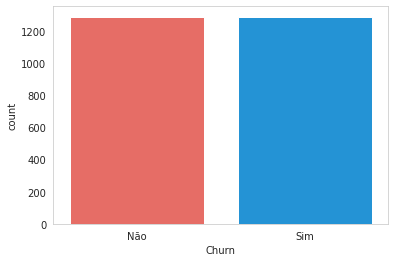

In [ ]:
# Criação do Pipeline para Normalização + Divisão de Dados por Cross-validation (5-folds)

# 1. Pré-processamento: ColumnTransformer()
# 2. Instanciamento do Modelo

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

x = df.drop(['customerID', 'Churn'], axis=1)
y = df.Churn

# Split do dataset em TREINO e TESTE. Posteriormente, o TREINO passará por testes internos pelo Cross-validation
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70)

# Como vimos anteriormente, nosso dataset está desbalanceado (pouco, mas está).
# Utilizaremos a abordagem Undersampling para balanceamento.

rus = RandomUnderSampler()
x_rus,y_rus = rus.fit_resample(x_train,y_train)

print(pd.Series(y_rus).value_counts())
plot = sns.countplot(y_rus, palette=[rgbConverter(252, 90, 80), rgbConverter(6, 154, 243)])
plot.set(xticklabels=['Não', 'Sim']);

# Modelos para Previsão

## Construção de Modelos

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

recall = {}

### Decision Tree - Modelo com dados balanceados

In [ ]:
# Decision Tree - Modelo com dados balanceados
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definição do Pipeline
clf_decisiontree = Pipeline(
    steps=[
           ('preprocessor', preprocessor),
           ('classifier', DecisionTreeClassifier())
    ]
)

# Definição de Parâmetros de busca para o GridSearchCV
param_grid_decisiontree = {
    'classifier__criterion': ['gini','entropy'],
    'classifier__max_depth': np.arange(3, 15)
}

# Preparando o Modelo GridSearch com o Pipeline e os Parâmetros de Busca
grid_search_decisiontree = GridSearchCV(
    clf_decisiontree,
    param_grid_decisiontree,
    cv=5,
    scoring='recall'
)

grid_search_decisiontree.fit(
    pd.DataFrame(x_rus, columns=x_train.columns),
    y_rus
);

In [ ]:
print("Model Score: %.3f" % grid_search_decisiontree.score(x_test, y_test))
recall[clf_decisiontree.steps[1][1].__class__.__name__] = grid_search_decisiontree.score(x_test, y_test)

Model Score: 0.795


In [ ]:
grid_search_decisiontree.best_params_

{'classifier__criterion': 'entropy', 'classifier__max_depth': 5}

### Stochastic Gradient Descent - Modelo com dados balanceados

In [ ]:
# Stochastic Gradient Descent - Modelo com dados balanceados
from sklearn.linear_model import SGDClassifier

# Definição do Pipeline
clf_sgd = Pipeline(
    steps=[
           ('preprocessor', preprocessor),
           ('classifier', SGDClassifier())
    ]
)

# Definição de Parâmetros de busca para o GridSearchCV
param_grid_sgd = {
    'classifier__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'classifier__loss': ['log'], # logistic regression,
    'classifier__penalty': ['l2'],
    'classifier__n_jobs': [-1]
}

# Preparando o Modelo GridSearch com o Pipeline e os Parâmetros de Busca
grid_search_sgd = GridSearchCV(
    clf_sgd,
    param_grid_sgd,
    cv=5,
    scoring='recall'
)

grid_search_sgd.fit(
    pd.DataFrame(x_rus, columns=x_train.columns),
    y_rus
);

In [ ]:
print("Model Score: %.3f" % grid_search_sgd.score(x_test, y_test))
recall[clf_sgd.steps[1][1].__class__.__name__] = grid_search_sgd.score(x_test, y_test)

Model Score: 0.716


In [ ]:
grid_search_sgd.best_params_

{'classifier__alpha': 1.0,
 'classifier__loss': 'log',
 'classifier__n_jobs': -1,
 'classifier__penalty': 'l2'}

### XGBoost - Modelo com dados balanceados

In [ ]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definição do Pipeline
clf_xgb = Pipeline(
    steps=[
           ('preprocessor', preprocessor),
           ('classifier', XGBClassifier())
    ]
)

# Definição de Parâmetros de busca para o GridSearchCV
param_grid_xgb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.003, 0.005, 0.01],
    'classifier__max_depth': [2, 3, 5],
    'classifier__subsample': [0.2, 0.3, 0.5],
    'classifier__gamma': [0,1]
}

# Preparando o Modelo GridSearch com o Pipeline e os Parâmetros de Busca
grid_search_xgb = GridSearchCV(
    clf_xgb,
    param_grid_xgb,
    cv=5,
    scoring='recall'
)

grid_search_xgb.fit(
    pd.DataFrame(x_rus, columns=x_train.columns),
    y_rus
);

In [ ]:
print("Model Score: %.3f" % grid_search_xgb.score(x_test, y_test))
recall[clf_xgb.steps[1][1].__class__.__name__] = grid_search_xgb.score(x_test, y_test)

Model Score: 0.866


In [ ]:
grid_search_xgb.best_params_

{'classifier__gamma': 0,
 'classifier__learning_rate': 0.003,
 'classifier__max_depth': 2,
 'classifier__n_estimators': 50,
 'classifier__subsample': 0.3}

### Regressão Logística - Modelo com dados balanceados

In [ ]:
# Regressão Logística - Modelo com dados balanceados
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf_logis = Pipeline(steps=[('preprocessor', preprocessor), 
                            ('classifier', LogisticRegression())])

param_grid_logis = {'classifier__C':[0.01,0.1,1.0,10,100]}

grid_search_logis_balanceados = GridSearchCV(
    clf_logis, 
    param_grid_logis, 
    cv=5, 
    scoring='recall'
)

grid_search_logis_balanceados.fit(pd.DataFrame(
    x_rus, columns=x_train.columns), y_rus);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print("model score: %.3f" % grid_search_logis_balanceados.score(x_test, y_test))
recall[clf_logis.steps[1][1].__class__.__name__] = grid_search_logis_balanceados.score(x_test, y_test)

model score: 0.781


In [ ]:
grid_search_logis_balanceados.best_params_

{'classifier__C': 10}

### LightGBM - Modelo com dados balanceados

In [ ]:
# LightGBM - Modelo com dados balanceados
from lightgbm import LGBMClassifier

clf_lgbm = Pipeline(steps=[('preprocessor', preprocessor), 
                            ('classifier', LGBMClassifier())])

param_grid_lgbm = {
    'classifier__num_leaves': [31, 127],
    'classifier__reg_alpha': [0.1, 0.5],
    'classifier__min_data_in_leaf': [30, 50, 100, 300, 400],
    'classifier__lambda_l1': [0, 1, 1.5],
    'classifier__lambda_l2': [0, 1]
}

grid_search_lgbm = GridSearchCV(
    clf_lgbm, 
    param_grid_lgbm, 
    cv=5, 
    scoring='recall'
)

grid_search_lgbm.fit(pd.DataFrame(
    x_rus, columns=x_train.columns), y_rus);

In [ ]:
# Avaliação dos modelos - Modelo com dados balanceados
print("model score: %.3f" % grid_search_lgbm.score(x_test, y_test))
recall[clf_lgbm.steps[1][1].__class__.__name__] = grid_search_lgbm.score(x_test, y_test)

model score: 0.753


### SVC - Modelo com dados balanceados

Este modelo está levando um tempo considerável para treinamento, portanto, não foi utilizado neste projeto.

In [ ]:
# # SVC - Modelo com dados balanceados
# from sklearn import svm

# # Definição do Pipeline
# clf_svc = Pipeline(
#     steps=[
#            ('preprocessor', preprocessor),
#            ('classifier', svm.SVC())
#     ]
# )

# # Definição de Parâmetros de busca para o GridSearchCV
# param_grid_svc = {
#     'classifier__C':[1,10,100,1000],
#     'classifier__gamma':[1,0.1,0.001,0.0001], 
#     'classifier__kernel':['linear','rbf']
#     }

# # Preparando o Modelo GridSearch com o Pipeline e os Parâmetros de Busca
# grid_search_svc = GridSearchCV(
#     clf_svc,
#     param_grid_svc,
#     cv=5,
#     scoring='recall'
# )

# grid_search_svc.fit(
#     pd.DataFrame(x_rus, columns=x_train.columns),
#     y_rus
# );

In [ ]:
# grid_search_svc.get_params().keys()

In [ ]:
# print("model score: %.3f" % grid_search_svc.score(x_test, y_test))
# recall[clf_svc.steps[1][1].__class__.__name__] = grid_search_svc.score(x_test, y_test)

### Random-forest Classifier - Modelo com dados balanceados

Este modelo está levando um tempo considerável para treinamento, portanto, não foi utilizado neste projeto.

In [ ]:
# # Random-forest Classifier - Modelo com dados balanceados
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# # Definição do Pipeline
# clf_rf = Pipeline(
#     steps=[
#            ('preprocessor', preprocessor),
#            ('classifier', RandomForestClassifier())
#     ]
# )

# # Definição de Parâmetros de busca para o GridSearchCV
# param_grid_rf = {
#     'classifier__bootstrap': [True, False],
#     'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#     'classifier__max_features': ['auto', 'sqrt'],
#     'classifier__min_samples_leaf': [1, 2, 4],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# }

# # Preparando o Modelo GridSearch com o Pipeline e os Parâmetros de Busca
# grid_search_rf = GridSearchCV(
#     clf_rf,
#     param_grid_rf,
#     cv=5,
#     scoring='recall'
# )

# grid_search_rf.fit(
#     pd.DataFrame(x_rus, columns=x_train.columns),
#     y_rus
# );

In [ ]:
# rf_score = grid_search_rf.score(x_test, y_test)
# print("Model Score: %.3f" % rf_score)
# recall[clf_rf.steps[1][1].__class__.__name__] = rf_score

## Seleção do Melhor Modelo da Etapa de Validação

In [ ]:
tabelaRecall = pd.DataFrame(list(recall.items()), columns=['Algoritmo', 'Recall'])

In [ ]:
tabelaRecall.sort_values(by="Recall", ascending=False)

,Algoritmo,Recall
2,XGBClassifier,0.865517
0,DecisionTreeClassifier,0.794828
3,LogisticRegression,0.781034
4,LGBMClassifier,0.753448
1,SGDClassifier,0.715517


Pode-se observar que o algoritmo XGBClassifier possui um desempenho relativamente maior do que os outros.

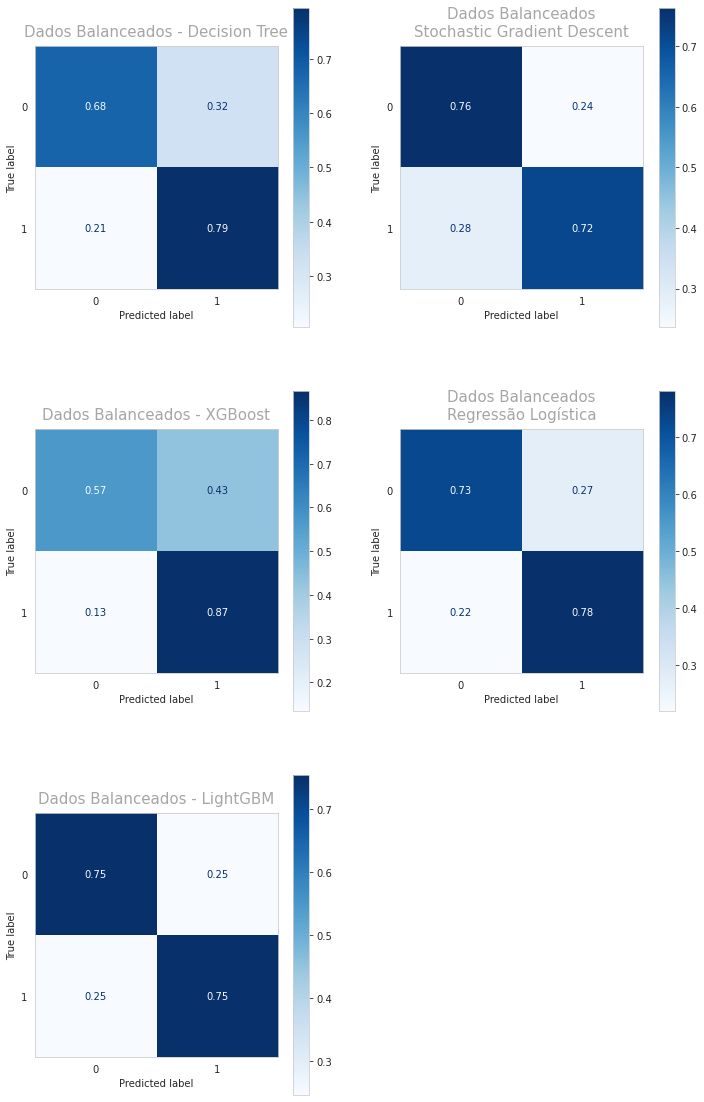

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,20))

plot_confusion_matrix(grid_search_decisiontree,x_test,y_test,normalize='true',ax=ax[0][0],cmap='Blues');
ax[0][0].set_title('Dados Balanceados - Decision Tree',loc='center',pad=10,fontdict={'fontsize':15},color='0.65')

plot_confusion_matrix(grid_search_sgd,x_test,y_test,normalize='true',ax=ax[0][1],cmap='Blues');
ax[0][1].set_title('Dados Balanceados\nStochastic Gradient Descent',loc='center',pad=10,fontdict={'fontsize':15},color='0.65')

plot_confusion_matrix(grid_search_xgb,x_test,y_test,normalize='true',ax=ax[1][0],cmap='Blues');
ax[1][0].set_title('Dados Balanceados - XGBoost',loc='center',pad=10,fontdict={'fontsize':15},color='0.65')

plot_confusion_matrix(grid_search_logis_balanceados,x_test,y_test,normalize='true',ax=ax[1][1],cmap='Blues');
ax[1][1].set_title('Dados Balanceados\nRegressão Logística',loc='center',pad=10,fontdict={'fontsize':15},color='0.65')

plot_confusion_matrix(grid_search_lgbm,x_test,y_test,normalize='true',ax=ax[2][0],cmap='Blues');
ax[2][0].set_title('Dados Balanceados - LightGBM',loc='center',pad=10,fontdict={'fontsize':15},color='0.65')

ax[2][1].set_visible(False)

# Conclusão

* O modelo XGBClassifier mostrou-se vencendor na escala de desempenho dos algoritmos, sendo capaz de **prever corretamente 87%** dos usuários verdadeiramente 'Churn', objetivo deste projeto.
* Mais uma vez, o balanceamento dos dados e utilização de técnicas avançadas de Machine Learning nos mostra que, apesar de adicionarem etapas a mais no projeto, levam a um ganho satisfatório de desempenho
* A utilização de dados de qualidade possibilitou um ganho na produtividade do projeto, apesar do desbalanceamento natural da feature 'Churn'.




# Referências


---

Adam Votava, **Churn Prediction Model**. Disponível em: https://towardsdatascience.com/churn-prediction-model-8a3f669cc760. Acesso em 28 de fevereiro de 2022.

---

Shearer C. **The CRISP-DM model: the new blueprint for data mining**. Disponível em: https://web.archive.org/web/20060624054212/http://www.crisp-dm.org/News/86605.pdf. Acesso em 28 de fevereiro de 2022.

---

VISHNU. **Optimal Parameters for SVC using Gridsearch**. Disponível em: https://www.kaggle.com/viznrvn/optimal-parameters-for-svc-using-gridsearch. Acesso em 10 de março de 2022.

--- 


